In [2]:
import numpy as np
from SimDataDB import SimDataDB
%matplotlib inline
from matplotlib import pylab as plt
from matplotlib.pyplot import imshow

In [3]:
sdb = SimDataDB('pix.db')

This databse is 14MB:

In [17]:
%ls -lh pix.db

-rw-r--r--@ 1 afq  staff    14M Feb 27 20:17 pix.db


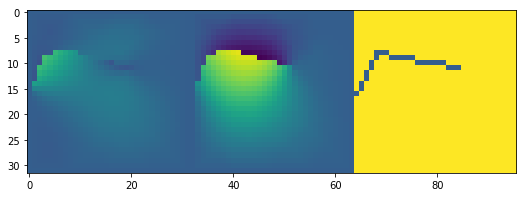

In [35]:
pic = sdb.Query('select pic from static order by random() limit 1')[0][0]
plt.figure(figsize=(9,3))
imshow(np.hstack([pic[:,:,0],pic[:,:,1],pic[:,:,2]]) )
plt.savefig("fracture_pic.png")

Failed to sort.


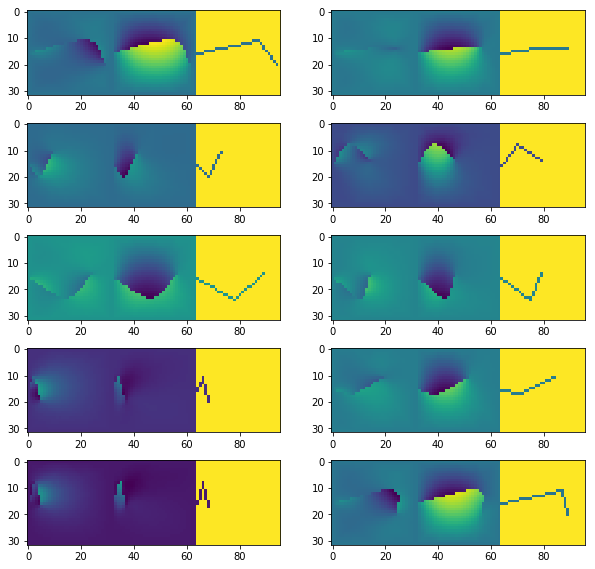

In [27]:
pics = sdb.Query('select pic from static order by random() limit 10')
plt.figure(figsize=(10,10))
for i,r in enumerate(pics):
    im3 = r[0]
    plt.subplot(5,2,i+1)
    im = np.hstack([im3[:,:,0],im3[:,:,1],im3[:,:,2]])
    imshow(im)
plt.show()

The pictures aren't the whole story. We want to look at macroscopic quantities. To this end, we integrate the entire strain energy over the domain:
\begin{equation}
W = \int_\Omega \frac{1}{2} \lambda \left(\mathrm{tr}\varepsilon\right)^2 + G \varepsilon : \varepsilon \mathrm{d}^2 x
\end{equation}
and the fracture energy over the length of the fracture:
\begin{equation}
G = \int_\Gamma  g_c \mathrm{d}^1 s
\end{equation}


Text(0,0.5,'W')

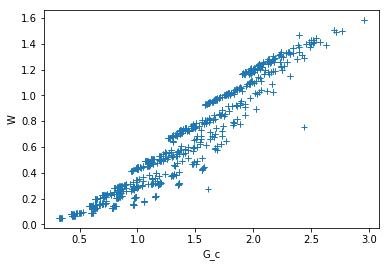

In [19]:
wgs = sdb.Query('select W,G_c from static')
x,y=zip(*wgs)
plt.plot(y,x,'+')
plt.xlabel('G_c')
plt.ylabel('W')

We see a loose correlation between the fracture energy and strain energy.